# Analysis Perspective: Movie Genres and Ratings Relationship

## Business Outcome

   The business recommendation ...


## The Data

   In this part of analysis, we will investigate the relationship between movie genres and ratings! We will use IMDB ratings data, stored in 'imdb.title.ratings.csv.gz' file, and IMDB movie title basisc data stored in 'imdb.title.basics.csv' file. 

Let's start reading these data files into two seperate Pandas dataframes. 

## Step 1. Importing Tools and the Information

First we need to import the libraries we will use for performing data exploration, analysis, and data visualization. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
!ls

Aidan's Cast and Crew Analysis .ipynb
README.md
bom.movie_gross.csv
emine.ipynb
imdb.name.basics.csv
imdb.title.akas.csv
imdb.title.basics.csv
imdb.title.crew.csv.gz
imdb.title.principals.csv
imdb.title.ratings.csv.gz
kaggle_tmdb_movies_data.csv
rt.movie_info.tsv
rt.reviews.csv
rt.reviews.numbers
rt.reviews.tsv
tmdb.movies.csv
tn.movie_budgets.csv


### Table 1

In [3]:
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz', compression='gzip')
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
imdb_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


### Table 2

In [5]:
imdb_title_basics = pd.read_csv('imdb.title.basics.csv')
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


## Step 2. Preparing our Dataframes 

### Step 2.1. Merging Dataframes

Before analysing the data, we need to construct the desired dataframe from IMDB title basics table and IMDB title ratings table. 

First of all, let's start with merging these two datafames by using 'tconst' column in both dataframes, and create a new 'imdb_title_and_ratings' dataframe.     

In [6]:
imbd_title_and_ratings = pd.merge(imdb_title_ratings, imdb_title_basics, on='tconst')
imbd_title_and_ratings

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


The imbd_title_and_ratings dataframe contains movies from 2010 to 2019.  

In [7]:
imbd_title_and_ratings.sort_values(by='start_year', ascending=False)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
23991,tt5929354,5.1,18,"Out of Sight, Out of Mind","Out of Sight, Out of Mind",2019,131.0,Drama
24002,tt5969180,6.5,1312,I Hate Kids,I Hate Kids,2019,89.0,Comedy
24012,tt6032090,8.6,15,Use Me,Use Me,2019,NaN,Thriller
24028,tt6081668,7.6,51,Mating,Parningsmarknaden,2019,93.0,Documentary
...,...,...,...,...,...,...,...,...
36328,tt1754573,8.8,21,Taliya.Date.Com,Taliya.Date.Com,2010,54.0,"Biography,Comedy,Documentary"
36325,tt1753960,7.4,67,Israel vs Israel,Israel vs Israel,2010,58.0,Documentary
17412,tt1640202,4.3,3706,Çok Filim Hareketler Bunlar,Çok Filim Hareketler Bunlar,2010,134.0,Comedy
17411,tt1639457,5.6,11,Indiana Jones und der Speer des Schicksals,Indiana Jones und der Speer des Schicksals,2010,66.0,"Action,Adventure"


Now, we need to sort the dataframe from highest to lowest rating movie!

We need to split genres name into separate categories!


In [8]:
sorted_df = imbd_title_and_ratings.sort_values(by='averagerating', ascending=False)
sorted_df['genres']= sorted_df['genres'].str.split(",")
sorted_df = sorted_df.explode('genres')
sorted_df

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
27644,tt8730716,10.0,5,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,Crime
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,Documentary
26153,tt2632430,10.0,5,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
65033,tt9715646,10.0,20,Renegade,Renegade,2019,NaN,Documentary
...,...,...,...,...,...,...,...,...
32440,tt2087999,1.0,7,Transgender Trouble,Transgender Trouble,2011,100.0,Music
36456,tt1896768,1.0,21,Kikkake wa You!,Kikkake wa You!,2011,75.0,Drama
36456,tt1896768,1.0,21,Kikkake wa You!,Kikkake wa You!,2011,75.0,Music
54856,tt1976600,1.0,436,Pick the Youth,Pi ke qing chun,2011,85.0,Drama


In [9]:
sorted_df.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,129294.000000,1.292940e+05,129294.000000,118953.000000
mean,6.303352,5.304729e+03,2014.218371,95.045640
std,1.458034,3.797311e+04,2.579059,156.455116
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.400000,1.600000e+01,2012.000000,82.000000
50%,6.400000,6.400000e+01,2014.000000,92.000000
75%,7.300000,4.230000e+02,2016.000000,105.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


### Step 2.2. Genre Counts

In our analysis, we need to compare average ratings with genres. 

We can look into the genre types in the 'sorted_imdb_title_and_ratings' dataframe, and see number of movie produced in each genre between 2010 and 2019. 

In [10]:
sorted_df['genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genres, dtype: int64

We will filter out any genre which has less than 30 entries due to respresentation concerns. According to value counts above, we need to filter out all movies with genres as Reality-TV, Adult, Game-Show, and Short from our analysis.

In [11]:
sorted_df['genres'].value_counts().values <= 30

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True])

In [12]:
sorted_df = sorted_df[sorted_df.genres != 'Reality-TV']

In [13]:
sorted_df = sorted_df[sorted_df.genres != 'Adult']

In [14]:
sorted_df = sorted_df[sorted_df.genres != 'Game-Show']

In [15]:
sorted_df = sorted_df[sorted_df.genres != 'Short']

In [16]:
sorted_df['genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Name: genres, dtype: int64

## Step 3. Grouping Ratings By Genres

In [17]:
imdb_mov_rat = sorted_df[['averagerating', 'genres']]
imdb_mov_rat

,averagerating,genres
27644,10.0,Documentary
8992,10.0,Crime
8992,10.0,Documentary
26153,10.0,Documentary
65033,10.0,Documentary
...,...,...
32440,1.0,Music
36456,1.0,Drama
36456,1.0,Music
54856,1.0,Drama


We will group by genres and calculate average ratings associated with each genre. 

In [18]:
imdb_mov_rat.groupby(['genres']).mean().sort_values(by='averagerating', ascending=False)

,averagerating
genres,
Documentary,7.332090
News,7.271330
Biography,7.162274
Music,7.091972
History,7.040956
Sport,6.961493
War,6.584291
Musical,6.498336
Drama,6.401559


In [19]:
imdb_genre_rating_df = imdb_mov_rat.groupby(['genres']).agg(['mean', 'count']).sort_values(by=('averagerating',  'mean'), ascending =False)
imdb_genre_rating_df

averagerating       
                     mean  count
genres                          
Documentary      7.332090  17753
News             7.271330    579
Biography        7.162274   3809
Music            7.091972   1968
History          7.040956   2825
Sport            6.961493   1179
War              6.584291    853
Musical          6.498336    721
Drama            6.401559  30788
Family           6.394725   3412
Animation        6.248308   1743
Adventure        6.196201   3817
Romance          6.146608   6589
Crime            6.115441   4611
Comedy           6.002689  17290
Mystery          5.920401   3039
Fantasy          5.919473   2126
Western          5.868214    280
Action           5.810361   6988
Thriller         5.639114   8217
Sci-Fi           5.489755   2206
Horror           5.003440   7674

## Step 4. Visualization 

#### Number of Movies in Each Genre

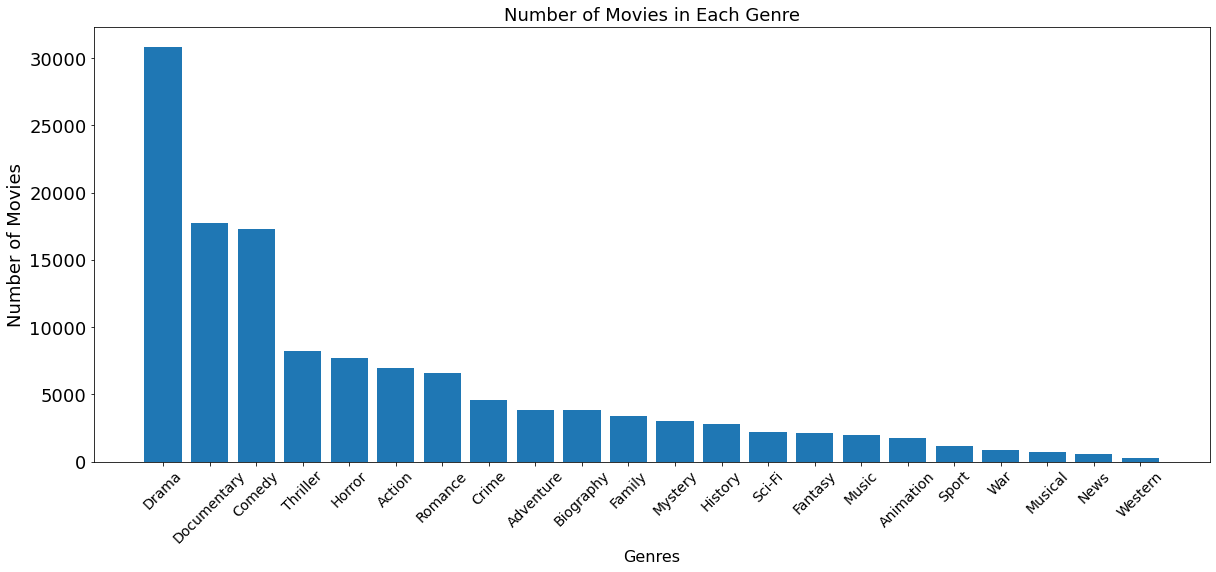

In [20]:
fig, ax = plt.subplots(figsize=(20, 8)) 
plt.xticks(rotation=45)
ax.bar(x=sorted_df['genres'].value_counts().index, height=sorted_df['genres'].value_counts())
ax.set_title('Number of Movies in Each Genre', fontsize=18)
ax.set_xlabel('Genres', fontsize=16)
ax.set_ylabel('Number of Movies', fontsize=18);
plt.xticks(fontsize=14)
plt.yticks(fontsize=18);

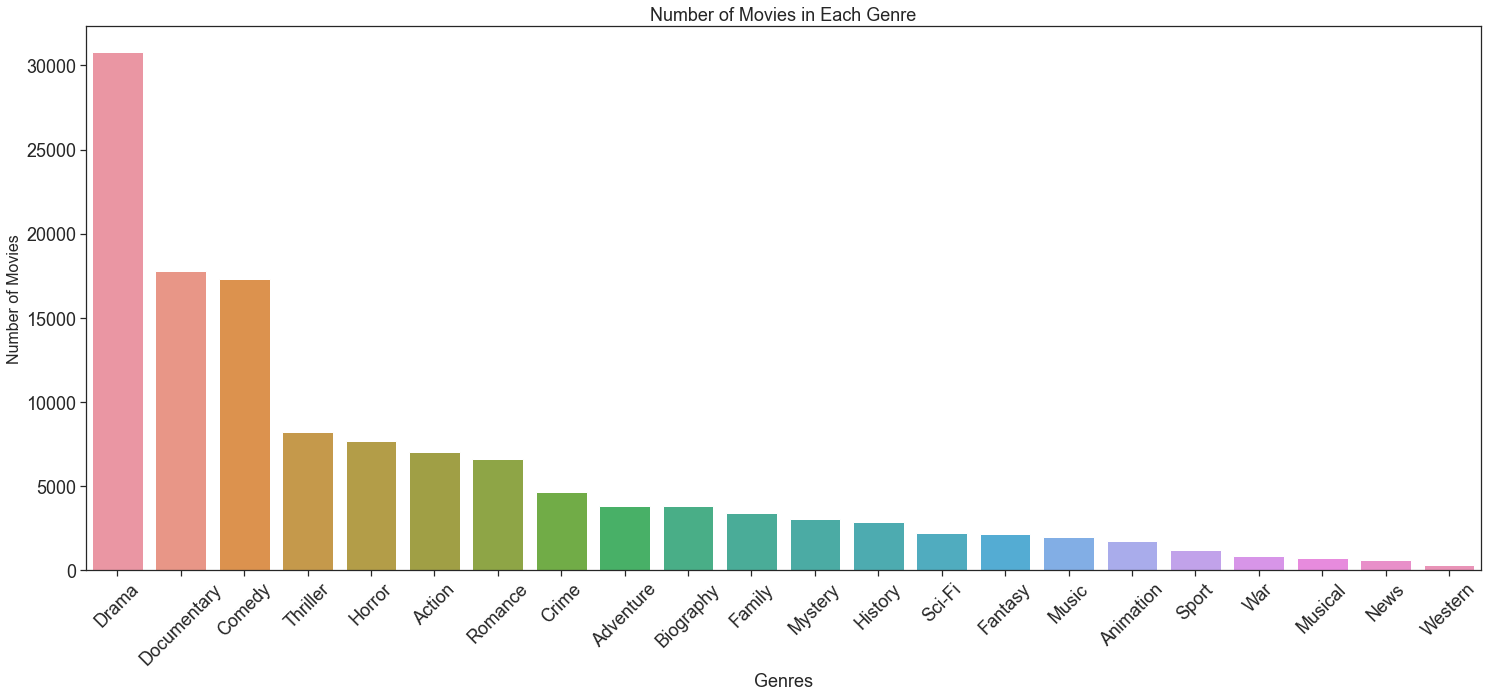

In [21]:
sns.set_theme(style="ticks", color_codes=True)
fig, ax = plt.subplots(figsize=(25, 10)) 
ax = sns.countplot(x="genres", data=sorted_df, order=sorted_df['genres'].value_counts().index)
ax.set_title('Number of Movies in Each Genre',fontsize=18)
ax.set_xlabel('Genres', fontsize=18)
ax.set_ylabel('Number of Movies', fontsize=16);
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

#### Number of Movies in Each Rating

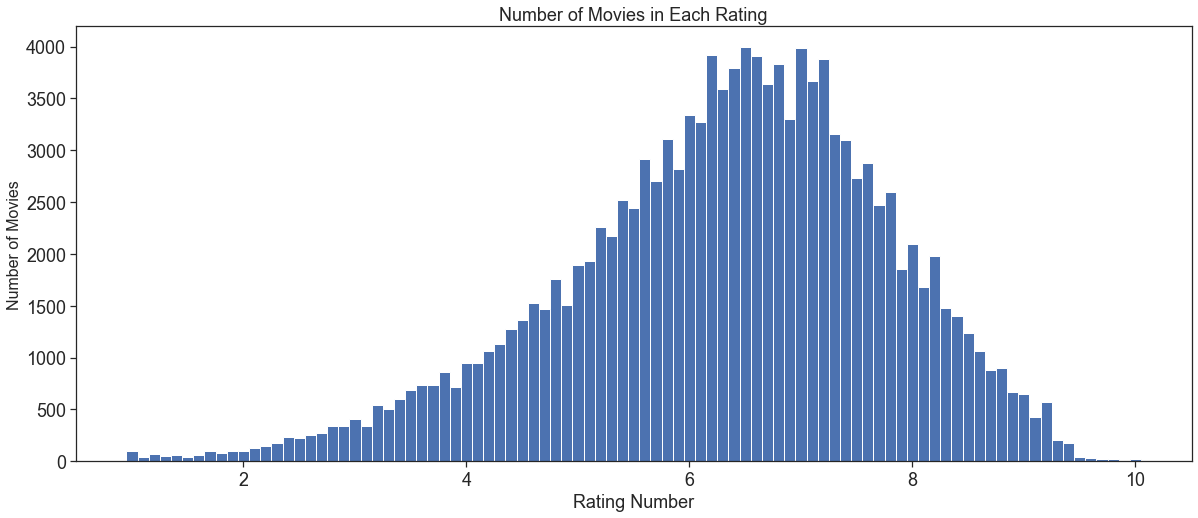

In [22]:
fig, ax = plt.subplots(figsize=(20, 8)) 
ax.bar(x=sorted_df['averagerating'].value_counts().index, height=sorted_df['averagerating'].value_counts(), width = 0.1)
ax.set_title('Number of Movies in Each Rating', fontsize=18)
ax.set_xlabel('Rating Number', fontsize=18)
ax.set_ylabel('Number of Movies', fontsize=16);
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

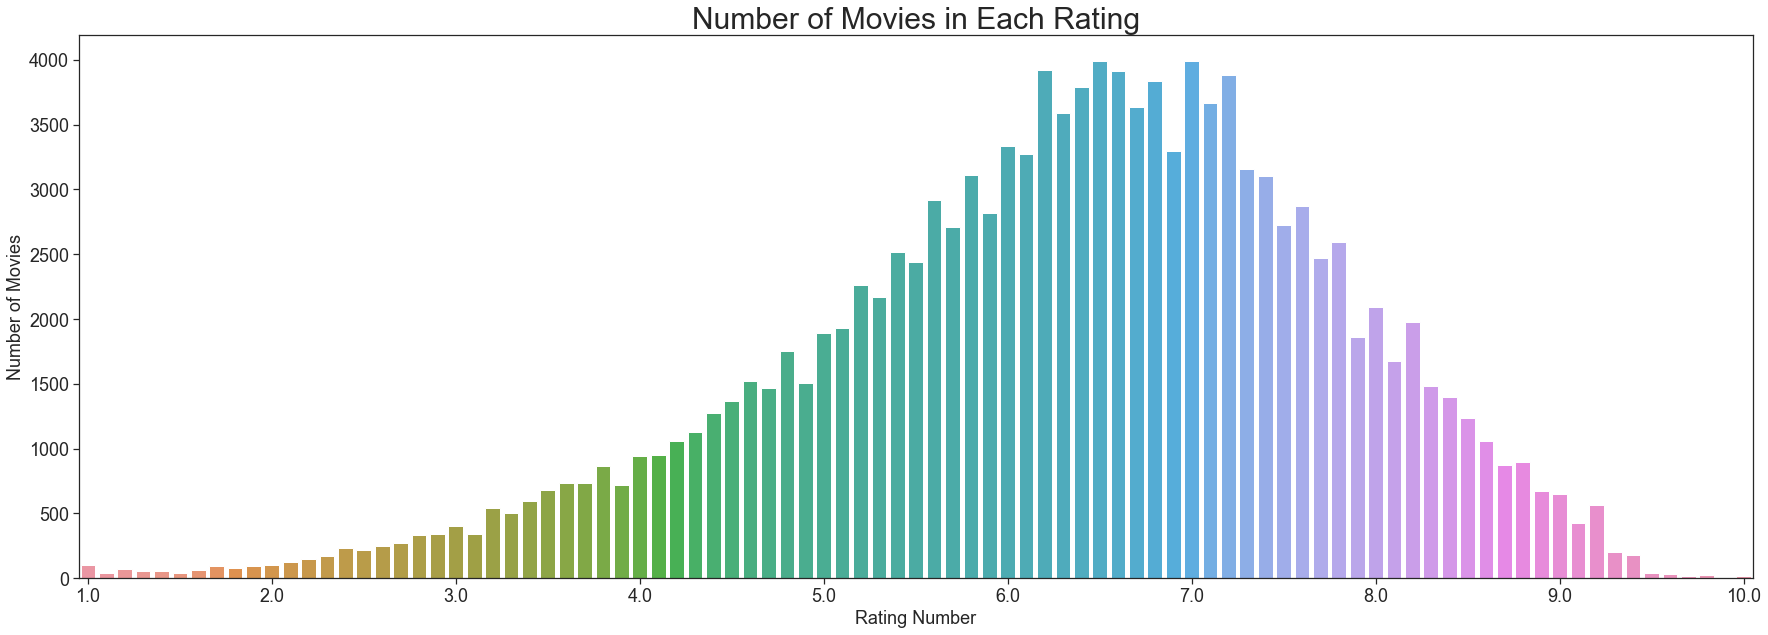

In [23]:
sns.set_theme(style="ticks", color_codes=True)
fig, ax = plt.subplots(figsize=(30,10)) 
ax = sns.countplot(x="averagerating", data=sorted_df)
ax.set_title('Number of Movies in Each Rating',fontsize=30)
ax.set_xlabel('Rating Number', fontsize=18)
ax.set_ylabel('Number of Movies', fontsize=18);
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

#### Genres vs. Ratings 

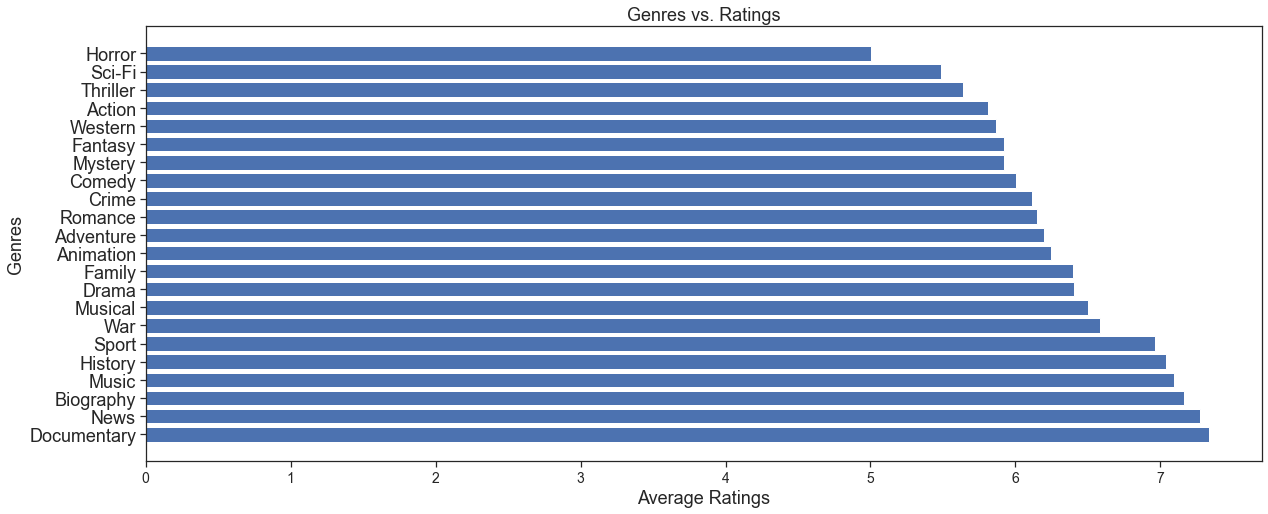

In [24]:
fig, ax = plt.subplots(figsize=(20, 8)) 

ax.barh(y=imdb_genre_rating_df.index, width=imdb_genre_rating_df[('averagerating', 'mean')])
ax.set_title('Genres vs. Ratings', fontsize=18)
ax.set_ylabel('Genres', fontsize=18)
ax.set_xlabel('Average Ratings', fontsize=18);
plt.xticks(fontsize=14)
plt.yticks(fontsize=18);

From the analysis above, we can conclude that using only average ratings as succes measure is not a good approach. While some genre types have ten thousands of movies, such as Drama and Documentary, the others have only hundreds, such as News and Western. Bewcause of this big diffrenece between the number of movies in each genre category, it is not easy to conclude which genre is more successful by only comparing average ratings!

Therefore, we will look into popularity measure for further investigation!


---


# Appendix

## A.1 Movie Genres and Popularity Relationship

Here we will do analysis according to genres and popularity. The data we used for this analysis is TMDB movies data retrieved from kaggle website : https://www.kaggle.com/juzershakir/tmdb-movies-dataset

This data covers movies from 1960 to 2015 years, but we will filter out movies which are released before 2010.

In [25]:
popularity_table = pd.read_csv('kaggle_tmdb_movies_data.csv')
popularity_table

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [26]:
popularity_table.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [27]:
popularity_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We can need 'populatity' and 'genres' column from this dataframe. It is seen that 23 movies have missing genre values. 

In order to continue analysis, we will drop movies with missing genre entries.

In [28]:
popularity_table[['original_title','popularity', 'genres']][popularity_table['genres'].isna()]

,original_title,popularity,genres
424,Belli di papÃ,0.244648,NaN
620,All Hallows' Eve 2,0.129696,NaN
997,Star Wars Rebels: Spark of Rebellion,0.330431,NaN
1712,Prayers for Bobby,0.302095,NaN
1897,Jonas Brothers: The Concert Experience,0.020701,NaN
2370,Freshman Father,0.081892,NaN
2376,Doctor Who: A Christmas Carol,0.068411,NaN
2853,Vizontele,0.130018,NaN
3279,ì•„ê¸°ì™€ ë‚˜,0.145331,NaN
4547,London 2012 Olympic Opening Ceremony: Isles of...,0.520520,NaN


In [29]:
popularity_table.dropna(axis = 0, subset = ['genres'] , inplace = True)

In [30]:
popularity_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10843 non-null  int64  
 1   imdb_id               10835 non-null  object 
 2   popularity            10843 non-null  float64
 3   budget                10843 non-null  int64  
 4   revenue               10843 non-null  int64  
 5   original_title        10843 non-null  object 
 6   cast                  10768 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10801 non-null  object 
 9   tagline               8037 non-null   object 
 10  keywords              9368 non-null   object 
 11  overview              10840 non-null  object 
 12  runtime               10843 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9827 non-null   object 
 15  release_date       

In [31]:
sorted_popularity = popularity_table.sort_values(by='popularity', ascending=False)
sorted_popularity['genres']= sorted_popularity['genres'].str.split("|")
sorted_popularity = sorted_popularity.explode('genres')
sorted_popularity['genres']

0                Action
0             Adventure
0       Science Fiction
0              Thriller
1                Action
             ...       
9977             Comedy
9977              Drama
6181              Drama
6181            History
6181            Western
Name: genres, Length: 26960, dtype: object

We will filter out movies release before 2010.

In [32]:
sorted_popularity = sorted_popularity[sorted_popularity['release_year']>=2010]
sorted_popularity['release_year'].value_counts()

2014    1470
2015    1386
2013    1383
2011    1278
2012    1275
2010    1216
Name: release_year, dtype: int64

If you look into value counts of each genre, we can see that movies with Western genre have movie counts less than 30. We will filter out Western genre due to respresentation concerns.

In [33]:
sorted_popularity['genres'].value_counts()

Drama              1454
Comedy             1039
Thriller            966
Action              679
Horror              592
Romance             445
Adventure           374
Science Fiction     365
Crime               340
Documentary         325
Family              304
Animation           253
Fantasy             232
Mystery             219
Music               140
History              79
TV Movie             76
War                  65
Foreign              33
Western              28
Name: genres, dtype: int64

In [34]:
pop_genre = sorted_popularity[['popularity', 'genres']]
pop_genre

,popularity,genres
0,32.985763,Action
0,32.985763,Adventure
0,32.985763,Science Fiction
0,32.985763,Thriller
1,28.419936,Action
...,...,...
4948,0.001372,Crime
4948,0.001372,Drama
4948,0.001372,History
4948,0.001372,Documentary


In [35]:
pop_genre.groupby(['genres']).mean().sort_values(by='popularity', ascending=False)

,popularity
genres,
Adventure,1.864340
Science Fiction,1.517798
Western,1.425661
Action,1.346614
Fantasy,1.304709
War,1.006723
Crime,0.985378
Family,0.947087
Animation,0.920306


In [36]:
pop_genre_df= pop_genre.groupby(['genres']).agg(['mean', 'count']).sort_values(by=('popularity',  'mean'), ascending =False)
pop_genre_df

popularity      
                      mean count
genres                          
Adventure         1.864340   374
Science Fiction   1.517798   365
Western           1.425661    28
Action            1.346614   679
Fantasy           1.304709   232
War               1.006723    65
Crime             0.985378   340
Family            0.947087   304
Animation         0.920306   253
Thriller          0.910043   966
Mystery           0.888042   219
History           0.731153    79
Drama             0.721727  1454
Comedy            0.708987  1039
Romance           0.681162   445
Music             0.500395   140
Horror            0.471589   592
TV Movie          0.287699    76
Documentary       0.175212   325
Foreign           0.151135    33

In [37]:
popularity_table[['popularity','original_title','release_year']].head()

,popularity,original_title,release_year
0,32.985763,Jurassic World,2015
1,28.419936,Mad Max: Fury Road,2015
2,13.112507,Insurgent,2015
3,11.173104,Star Wars: The Force Awakens,2015
4,9.335014,Furious 7,2015


#### Genres vs. Popularity

This graph shows popularity of each genre when the movies' released date are between 2010-2015.

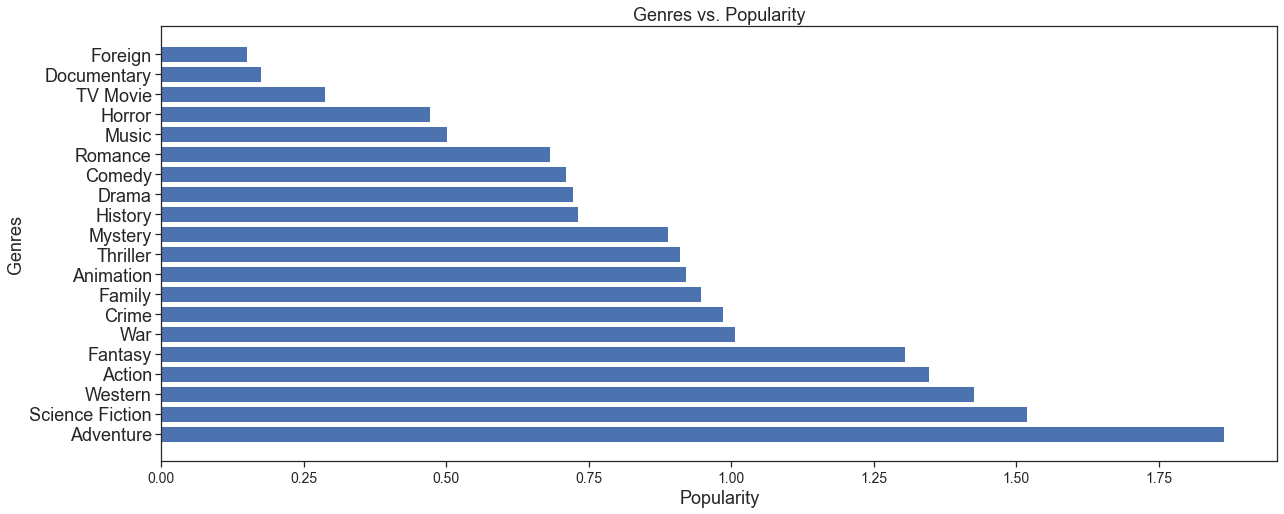

In [38]:
fig, ax = plt.subplots(figsize=(20, 8)) 

ax.barh(y=pop_genre_df.index, width=pop_genre_df[('popularity', 'mean')])

ax.set_title('Genres vs. Popularity', fontsize=18)
ax.set_ylabel('Genres', fontsize=18)
ax.set_xlabel('Popularity', fontsize=18);
plt.xticks(fontsize=14)
plt.yticks(fontsize=18);


# A.2 Comparison of Ratings vs. Popularity Outcomes

In order to compare ratings and popularity of each genre, we need to make both analysis within same time frame, which is 2010-2015. 

Therefore, we need to filter out any movies released after 2015 from genres vs. ratings analysis.


In [39]:
sorted_df_before2016 = sorted_df[sorted_df['start_year']<2016]
sorted_df_before2016

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,Crime
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,Documentary
26153,tt2632430,10.0,5,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
6784,tt5390098,10.0,5,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary
45335,tt6991826,10.0,5,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary
...,...,...,...,...,...,...,...,...
32440,tt2087999,1.0,7,Transgender Trouble,Transgender Trouble,2011,100.0,Music
36456,tt1896768,1.0,21,Kikkake wa You!,Kikkake wa You!,2011,75.0,Drama
36456,tt1896768,1.0,21,Kikkake wa You!,Kikkake wa You!,2011,75.0,Music
54856,tt1976600,1.0,436,Pick the Youth,Pi ke qing chun,2011,85.0,Drama


In [40]:
sorted_df_before2016.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,83803.000000,8.380300e+04,83803.000000,77762.00000
mean,6.280779,6.010550e+03,2012.658270,94.04308
std,1.436639,4.263930e+04,1.688321,192.57345
min,1.000000,5.000000e+00,2010.000000,3.00000
25%,5.400000,1.500000e+01,2011.000000,81.00000
50%,6.400000,6.200000e+01,2013.000000,90.00000
75%,7.300000,4.320000e+02,2014.000000,103.00000
max,10.000000,1.841066e+06,2015.000000,51420.00000


In [41]:
sorted_df_before2016['genres'].value_counts()

Drama          19828
Documentary    11727
Comedy         11024
Thriller        5114
Horror          4766
Action          4371
Romance         4347
Crime           2932
Biography       2742
Adventure       2435
Family          2328
History         2060
Mystery         1866
Music           1406
Sci-Fi          1388
Fantasy         1332
Animation       1072
Sport            760
War              553
News             540
Musical          472
Western          180
Name: genres, dtype: int64

In [42]:
imdb_genre_rating_df_before2016 = sorted_df_before2016[['averagerating', 'genres']].groupby(['genres']).agg(['mean', 'count']).sort_values(by=('averagerating',  'mean'), ascending =False)
imdb_genre_rating_df_before2016

averagerating       
                     mean  count
genres                          
Documentary      7.291106  11727
News             7.284630    540
Biography        7.189059   2742
Music            7.113229   1406
History          7.040534   2060
Sport            6.909605    760
War              6.554611    553
Musical          6.427966    472
Family           6.408806   2328
Drama            6.348633  19828
Animation        6.249160   1072
Adventure        6.206448   2435
Crime            6.101057   2932
Romance          6.079618   4347
Western          5.983333    180
Comedy           5.964296  11024
Mystery          5.870096   1866
Fantasy          5.852628   1332
Action           5.768588   4371
Thriller         5.582030   5114
Sci-Fi           5.363545   1388
Horror           4.928787   4766

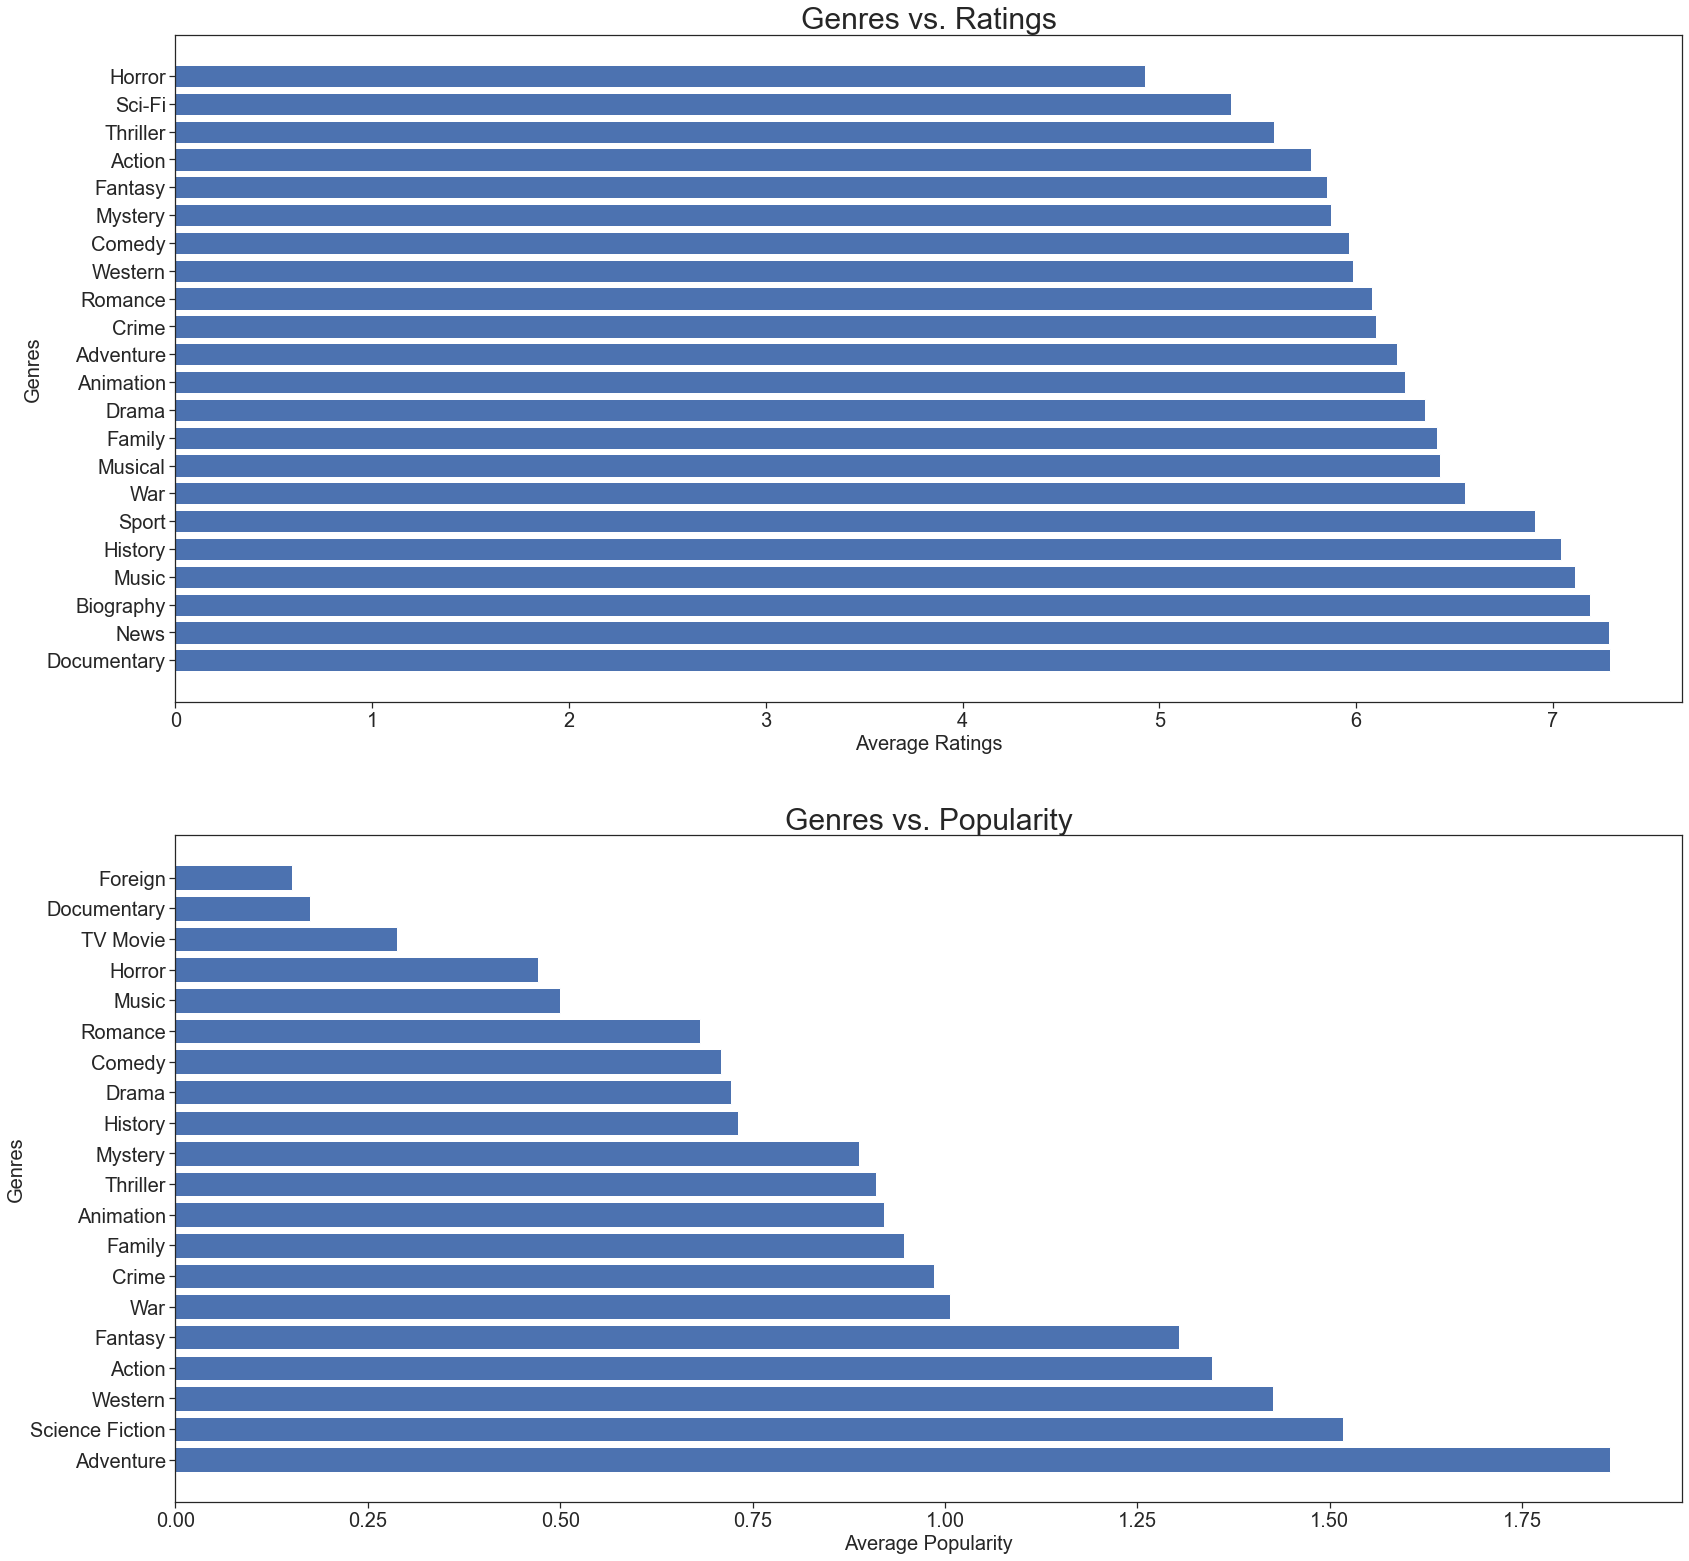

In [43]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(27, 27))


ax1.barh(y=imdb_genre_rating_df_before2016.index, width=imdb_genre_rating_df_before2016[('averagerating', 'mean')])
ax1.set_title('Genres vs. Ratings', fontsize=30)
ax1.set_xlabel('Average Ratings', fontsize=20);
ax1.set_ylabel('Genres', fontsize=20)
ax1.tick_params(labelsize=20)


ax2.barh(y=pop_genre_df.index, width=pop_genre_df[('popularity', 'mean')])
ax2.set_title('Genres vs. Popularity', fontsize=30)
ax2.set_ylabel('Genres', fontsize=20)
ax2.set_xlabel('Average Popularity', fontsize=20)
ax2.tick_params(labelsize=20);


Now, we want to create a new variable for average ratings per popularity for each genre type so that we can compare and sort genres!

In [44]:
imdb_genre_rating_df_before2016

averagerating       
                     mean  count
genres                          
Documentary      7.291106  11727
News             7.284630    540
Biography        7.189059   2742
Music            7.113229   1406
History          7.040534   2060
Sport            6.909605    760
War              6.554611    553
Musical          6.427966    472
Family           6.408806   2328
Drama            6.348633  19828
Animation        6.249160   1072
Adventure        6.206448   2435
Crime            6.101057   2932
Romance          6.079618   4347
Western          5.983333    180
Comedy           5.964296  11024
Mystery          5.870096   1866
Fantasy          5.852628   1332
Action           5.768588   4371
Thriller         5.582030   5114
Sci-Fi           5.363545   1388
Horror           4.928787   4766

In [45]:
pop_genre_df

popularity      
                      mean count
genres                          
Adventure         1.864340   374
Science Fiction   1.517798   365
Western           1.425661    28
Action            1.346614   679
Fantasy           1.304709   232
War               1.006723    65
Crime             0.985378   340
Family            0.947087   304
Animation         0.920306   253
Thriller          0.910043   966
Mystery           0.888042   219
History           0.731153    79
Drama             0.721727  1454
Comedy            0.708987  1039
Romance           0.681162   445
Music             0.500395   140
Horror            0.471589   592
TV Movie          0.287699    76
Documentary       0.175212   325
Foreign           0.151135    33

First, we should merge popularity table named 'pop_genre_df' with IMDB genre ratings table named 'imdb_genre_rating_df_before2016'. Then we will create new column for ratings per popularity, and name it as 'rate_per_popularity'. 

In [46]:
rating_per_pop = pd.merge(imdb_genre_rating_df_before2016, pop_genre_df, on='genres')
rating_per_pop

averagerating        popularity      
                     mean  count       mean count
genres                                           
Documentary      7.291106  11727   0.175212   325
Music            7.113229   1406   0.500395   140
History          7.040534   2060   0.731153    79
War              6.554611    553   1.006723    65
Family           6.408806   2328   0.947087   304
Drama            6.348633  19828   0.721727  1454
Animation        6.249160   1072   0.920306   253
Adventure        6.206448   2435   1.864340   374
Crime            6.101057   2932   0.985378   340
Romance          6.079618   4347   0.681162   445
Western          5.983333    180   1.425661    28
Comedy           5.964296  11024   0.708987  1039
Mystery          5.870096   1866   0.888042   219
Fantasy          5.852628   1332   1.304709   232
Action           5.768588   4371   1.346614   679
Thriller         5.582030   5114   0.910043   966
Horror           4.928787   4766   0.471589   592

In [47]:
rating_per_pop['rateperpop'] = rating_per_pop[('averagerating', 'mean')]/rating_per_pop[('popularity', 'mean')]
rating_per_pop.sort_values(by='rateperpop', ascending=False, inplace=True)

Now, let's visualize the ratings per popularity for each genre!

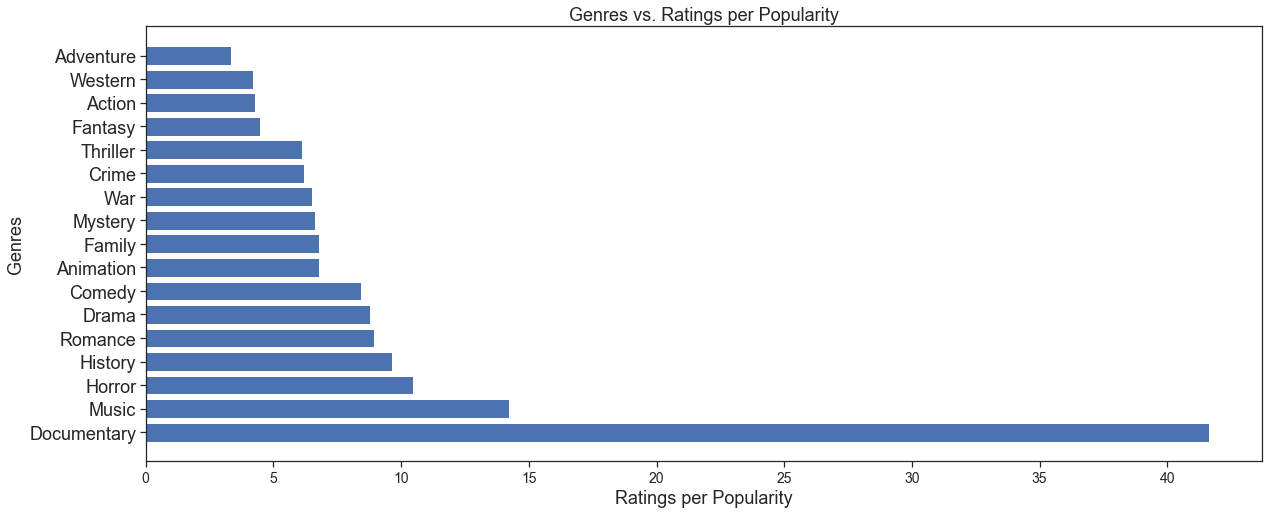

In [48]:
fig, ax = plt.subplots(figsize=(20, 8)) 

ax.barh(y=rating_per_pop.index, width=rating_per_pop['rateperpop'])

ax.set_title('Genres vs. Ratings per Popularity', fontsize=18)
ax.set_ylabel('Genres', fontsize=18)
ax.set_xlabel('Ratings per Popularity', fontsize=18);
plt.xticks(fontsize=14)
plt.yticks(fontsize=18);